In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib  inline
from sklearn.model_selection import train_test_split, cross_val_score
import seaborn as sns

# first using the Support vector classifier for model training
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,VotingClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import BernoulliNB
from xgboost import XGBClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix,roc_auc_score,roc_curve

In [ ]:
dataset = pd.read_csv('training.csv')

In [ ]:
dataset.head()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,DER_lep_eta_centrality,PRI_tau_pt,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
0,100000,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,197.760,1.582,1.396,0.2,32.638,1.017,0.381,51.626,2.273,-2.414,16.824,-0.277,258.733,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497,0.002653,s
1,100001,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,125.157,0.879,1.414,-999.0,42.014,2.039,-3.011,36.918,0.501,0.103,44.704,-1.916,164.546,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226,2.233584,b
2,100002,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,197.814,3.776,1.414,-999.0,32.154,-0.705,-2.093,121.409,-0.953,1.052,54.283,-2.186,260.414,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251,2.347389,b
3,100003,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,0.414,75.968,2.354,-1.285,-999.0,22.647,-1.655,0.010,53.321,-0.522,-3.100,31.082,0.060,86.062,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,-0.000,5.446378,b
4,100004,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,57.983,1.056,-1.385,-999.0,28.209,-2.197,-2.231,29.774,0.798,1.569,2.723,-0.871,53.131,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,6.245333,b


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   EventId                      250000 non-null  int64  
 1   DER_mass_MMC                 250000 non-null  float64
 2   DER_mass_transverse_met_lep  250000 non-null  float64
 3   DER_mass_vis                 250000 non-null  float64
 4   DER_pt_h                     250000 non-null  float64
 5   DER_deltaeta_jet_jet         250000 non-null  float64
 6   DER_mass_jet_jet             250000 non-null  float64
 7   DER_prodeta_jet_jet          250000 non-null  float64
 8   DER_deltar_tau_lep           250000 non-null  float64
 9   DER_pt_tot                   250000 non-null  float64
 10  DER_sum_pt                   250000 non-null  float64
 11  DER_pt_ratio_lep_tau         250000 non-null  float64
 12  DER_met_phi_centrality       250000 non-null  float64
 13 

In [ ]:
dataset.drop(columns='EventId', inplace=True)

In [ ]:
dataset.columns

Index(['DER_mass_MMC', 'DER_mass_transverse_met_lep', 'DER_mass_vis',
       'DER_pt_h', 'DER_deltaeta_jet_jet', 'DER_mass_jet_jet',
       'DER_prodeta_jet_jet', 'DER_deltar_tau_lep', 'DER_pt_tot', 'DER_sum_pt',
       'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality',
       'DER_lep_eta_centrality', 'PRI_tau_pt', 'PRI_tau_eta', 'PRI_tau_phi',
       'PRI_lep_pt', 'PRI_lep_eta', 'PRI_lep_phi', 'PRI_met', 'PRI_met_phi',
       'PRI_met_sumet', 'PRI_jet_num', 'PRI_jet_leading_pt',
       'PRI_jet_leading_eta', 'PRI_jet_leading_phi', 'PRI_jet_subleading_pt',
       'PRI_jet_subleading_eta', 'PRI_jet_subleading_phi', 'PRI_jet_all_pt',
       'Weight', 'Label'],
      dtype='object')

In [ ]:
dataset.describe()

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,DER_lep_eta_centrality,PRI_tau_pt,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight
count,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000
mean,-49.023079,49.239819,81.181982,57.895962,-708.420675,-601.237051,-709.356603,2.373100,18.917332,158.432217,1.437609,-0.128305,-708.985189,38.707419,-0.010973,-0.008171,46.660207,-0.019507,0.043543,41.717235,-0.010119,209.797178,0.979176,-348.329567,-399.254314,-399.259788,-692.381204,-709.121609,-709.118631,73.064591,1.646767
std,406.345647,35.344886,40.828691,63.655682,454.480565,657.972302,453.019877,0.782911,22.273494,115.706115,0.844743,1.193585,453.596721,22.412081,1.214079,1.816763,22.064922,1.264982,1.816611,32.894693,1.812223,126.499506,0.977426,532.962789,489.338286,489.333883,479.875496,453.384624,453.389017,98.015662,1.875103
min,-999.000000,0.000000,6.329000,0.000000,-999.000000,-999.000000,-999.000000,0.208000,0.000000,46.104000,0.047000,-1.414000,-999.000000,20.000000,-2.499000,-3.142000,26.000000,-2.505000,-3.142000,0.109000,-3.142000,13.678000,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,0.000000,0.001502
25%,78.100750,19.241000,59.388750,14.068750,-999.000000,-999.000000,-999.000000,1.810000,2.841000,77.550000,0.883000,-1.371000,-999.000000,24.591750,-0.925000,-1.575000,32.375000,-1.014000,-1.522000,21.398000,-1.575000,123.017500,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,0.000000,0.018636
50%,105.012000,46.524000,73.752000,38.467500,-999.000000,-999.000000,-999.000000,2.491500,12.315500,120.664500,1.280000,-0.356000,-999.000000,31.804000,-0.023000,-0.033000,40.516000,-0.045000,0.086000,34.802000,-0.024000,179.739000,1.000000,38.960000,-1.872000,-2.093000,-999.000000,-999.000000,-999.000000,40.512500,1.156188
75%,130.606250,73.598000,92.259000,79.169000,0.490000,83.446000,-4.593000,2.961000,27.591000,200.478250,1.777000,1.225000,0.000000,45.017000,0.898000,1.565000,53.390000,0.959000,1.618000,51.895000,1.561000,263.379250,2.000000,75.349000,0.433000,0.503000,33.703000,-2.457000,-2.275000,109.933750,2.404128
max,1192.026000,690.075000,1349.351000,2834.999000,8.503000,4974.979000,16.690000,5.684000,2834.999000,1852.462000,19.773000,1.414000,1.000000,764.408000,2.497000,3.142000,560.271000,2.503000,3.142000,2842.617000,3.142000,2003.976000,3.000000,1120.573000,4.499000,3.141000,721.456000,4.500000,3.142000,1633.433000,7.822543


In [ ]:
dataset.isnull().sum()

DER_mass_MMC                   0
DER_mass_transverse_met_lep    0
DER_mass_vis                   0
DER_pt_h                       0
DER_deltaeta_jet_jet           0
DER_mass_jet_jet               0
DER_prodeta_jet_jet            0
DER_deltar_tau_lep             0
DER_pt_tot                     0
DER_sum_pt                     0
DER_pt_ratio_lep_tau           0
DER_met_phi_centrality         0
DER_lep_eta_centrality         0
PRI_tau_pt                     0
PRI_tau_eta                    0
PRI_tau_phi                    0
PRI_lep_pt                     0
PRI_lep_eta                    0
PRI_lep_phi                    0
PRI_met                        0
PRI_met_phi                    0
PRI_met_sumet                  0
PRI_jet_num                    0
PRI_jet_leading_pt             0
PRI_jet_leading_eta            0
PRI_jet_leading_phi            0
PRI_jet_subleading_pt          0
PRI_jet_subleading_eta         0
PRI_jet_subleading_phi         0
PRI_jet_all_pt                 0
Weight    

In [ ]:
dataset.isna().sum()

DER_mass_MMC                   0
DER_mass_transverse_met_lep    0
DER_mass_vis                   0
DER_pt_h                       0
DER_deltaeta_jet_jet           0
DER_mass_jet_jet               0
DER_prodeta_jet_jet            0
DER_deltar_tau_lep             0
DER_pt_tot                     0
DER_sum_pt                     0
DER_pt_ratio_lep_tau           0
DER_met_phi_centrality         0
DER_lep_eta_centrality         0
PRI_tau_pt                     0
PRI_tau_eta                    0
PRI_tau_phi                    0
PRI_lep_pt                     0
PRI_lep_eta                    0
PRI_lep_phi                    0
PRI_met                        0
PRI_met_phi                    0
PRI_met_sumet                  0
PRI_jet_num                    0
PRI_jet_leading_pt             0
PRI_jet_leading_eta            0
PRI_jet_leading_phi            0
PRI_jet_subleading_pt          0
PRI_jet_subleading_eta         0
PRI_jet_subleading_phi         0
PRI_jet_all_pt                 0
Weight    

In [ ]:
dataset.shape

(250000, 32)

In [ ]:
dataset['Label'].unique()

array(['s', 'b'], dtype=object)

In [ ]:
dataset['Label'].value_counts()

# class_counts = dataset.groupby('Label').size()
# print(class_counts)

b    164333
s     85667
Name: Label, dtype: int64

In [ ]:
# dataset['Label'] = dataset['Label'].replace('s',0)
# dataset['Label'] = dataset['Label'].replace('b',1)

In [ ]:
# getting dummy variables column
enc = LabelEncoder()

dataset['Label'] = enc.fit_transform(dataset['Label'])


In [ ]:
dataset.head()

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,DER_lep_eta_centrality,PRI_tau_pt,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
0,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,197.760,1.582,1.396,0.2,32.638,1.017,0.381,51.626,2.273,-2.414,16.824,-0.277,258.733,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497,0.002653,1
1,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,125.157,0.879,1.414,-999.0,42.014,2.039,-3.011,36.918,0.501,0.103,44.704,-1.916,164.546,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226,2.233584,0
2,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,197.814,3.776,1.414,-999.0,32.154,-0.705,-2.093,121.409,-0.953,1.052,54.283,-2.186,260.414,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251,2.347389,0
3,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,0.414,75.968,2.354,-1.285,-999.0,22.647,-1.655,0.010,53.321,-0.522,-3.100,31.082,0.060,86.062,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,-0.000,5.446378,0
4,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,57.983,1.056,-1.385,-999.0,28.209,-2.197,-2.231,29.774,0.798,1.569,2.723,-0.871,53.131,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,6.245333,0


(array([164333.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,  85667.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

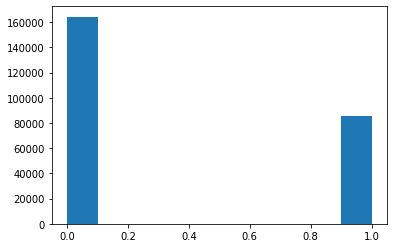

In [ ]:
plt.hist(dataset['Label'])

In [ ]:
#As we know that Negative values are meaning less so converting values to 0

dataset[dataset == -999.00 ] = 0

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
dataset.head()

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,DER_lep_eta_centrality,PRI_tau_pt,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
0,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,197.760,1.582,1.396,0.2,32.638,1.017,0.381,51.626,2.273,-2.414,16.824,-0.277,258.733,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497,0.002653,1
1,160.937,68.768,103.235,48.146,0.00,0.000,0.000,3.473,2.078,125.157,0.879,1.414,0.0,42.014,2.039,-3.011,36.918,0.501,0.103,44.704,-1.916,164.546,1,46.226,0.725,1.158,0.000,0.00,0.000,46.226,2.233584,0
2,0.000,162.172,125.953,35.635,0.00,0.000,0.000,3.148,9.336,197.814,3.776,1.414,0.0,32.154,-0.705,-2.093,121.409,-0.953,1.052,54.283,-2.186,260.414,1,44.251,2.053,-2.028,0.000,0.00,0.000,44.251,2.347389,0
3,143.905,81.417,80.943,0.414,0.00,0.000,0.000,3.310,0.414,75.968,2.354,-1.285,0.0,22.647,-1.655,0.010,53.321,-0.522,-3.100,31.082,0.060,86.062,0,0.000,0.000,0.000,0.000,0.00,0.000,-0.000,5.446378,0
4,175.864,16.915,134.805,16.405,0.00,0.000,0.000,3.891,16.405,57.983,1.056,-1.385,0.0,28.209,-2.197,-2.231,29.774,0.798,1.569,2.723,-0.871,53.131,0,0.000,0.000,0.000,0.000,0.00,0.000,0.000,6.245333,0


In [ ]:
dataset.describe()

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,DER_lep_eta_centrality,PRI_tau_pt,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
count,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000
mean,103.280465,49.239819,81.181982,57.895962,0.697497,107.881121,-0.238431,2.373100,18.917332,158.432217,1.437609,-0.128305,0.132983,38.707419,-0.010973,-0.008171,46.660207,-0.019507,0.043543,41.717235,-0.010119,209.797178,0.979176,50.922781,-0.001966,-0.007440,16.736968,-0.003437,-0.000459,73.064591,1.646767,0.342668
std,68.566103,35.344886,40.828691,63.655682,1.439050,272.698950,1.966484,0.782911,22.273494,115.706115,0.844743,1.193585,0.298968,22.412081,1.214079,1.816763,22.064922,1.264982,1.816611,32.894693,1.812223,126.499506,0.977426,62.733376,1.382703,1.405061,31.338880,1.094459,0.978743,98.015662,1.875103,0.474603
min,0.000000,0.000000,6.329000,0.000000,0.000000,0.000000,-18.066000,0.208000,0.000000,46.104000,0.047000,-1.414000,0.000000,20.000000,-2.499000,-3.142000,26.000000,-2.505000,-3.142000,0.109000,-3.142000,13.678000,0.000000,0.000000,-4.499000,-3.142000,0.000000,-4.500000,-3.142000,0.000000,0.001502,0.000000
25%,78.100750,19.241000,59.388750,14.068750,0.000000,0.000000,0.000000,1.810000,2.841000,77.550000,0.883000,-1.371000,0.000000,24.591750,-0.925000,-1.575000,32.375000,-1.014000,-1.522000,21.398000,-1.575000,123.017500,0.000000,0.000000,-0.433000,-0.556000,0.000000,0.000000,0.000000,0.000000,0.018636,0.000000
50%,105.012000,46.524000,73.752000,38.467500,0.000000,0.000000,0.000000,2.491500,12.315500,120.664500,1.280000,-0.356000,0.000000,31.804000,-0.023000,-0.033000,40.516000,-0.045000,0.086000,34.802000,-0.024000,179.739000,1.000000,38.960000,0.000000,0.000000,0.000000,0.000000,0.000000,40.512500,1.156188,0.000000
75%,130.606250,73.598000,92.259000,79.169000,0.490000,83.446000,0.000000,2.961000,27.591000,200.478250,1.777000,1.225000,0.000000,45.017000,0.898000,1.565000,53.390000,0.959000,1.618000,51.895000,1.561000,263.379250,2.000000,75.349000,0.433000,0.503000,33.703000,0.000000,0.000000,109.933750,2.404128,1.000000
max,1192.026000,690.075000,1349.351000,2834.999000,8.503000,4974.979000,16.690000,5.684000,2834.999000,1852.462000,19.773000,1.414000,1.000000,764.408000,2.497000,3.142000,560.271000,2.503000,3.142000,2842.617000,3.142000,2003.976000,3.000000,1120.573000,4.499000,3.141000,721.456000,4.500000,3.142000,1633.433000,7.822543,1.000000


In [ ]:

correlations = dataset.corr(method='pearson')
print(correlations)

                             DER_mass_MMC  ...     Label
DER_mass_MMC                     1.000000  ...  0.161623
DER_mass_transverse_met_lep     -0.171892  ... -0.351428
DER_mass_vis                     0.658959  ... -0.014055
DER_pt_h                         0.143550  ...  0.192526
DER_deltaeta_jet_jet             0.087368  ...  0.227925
DER_mass_jet_jet                 0.073189  ...  0.227832
DER_prodeta_jet_jet             -0.027799  ... -0.189891
DER_deltar_tau_lep               0.454145  ...  0.012245
DER_pt_tot                       0.037960  ... -0.015287
DER_sum_pt                       0.210713  ...  0.153236
DER_pt_ratio_lep_tau             0.034266  ... -0.195398
DER_met_phi_centrality           0.244080  ...  0.271752
DER_lep_eta_centrality           0.076215  ...  0.223175
PRI_tau_pt                       0.256039  ...  0.235238
PRI_tau_eta                      0.003288  ... -0.000943
PRI_tau_phi                     -0.005930  ... -0.004403
PRI_lep_pt                     

In [ ]:
skew = dataset.skew()
print(skew)

DER_mass_MMC                    1.860038
DER_mass_transverse_met_lep     1.219211
DER_mass_vis                    3.790262
DER_pt_h                        2.541885
DER_deltaeta_jet_jet            2.212843
DER_mass_jet_jet                4.222936
DER_prodeta_jet_jet            -1.441259
DER_deltar_tau_lep             -0.215782
DER_pt_tot                     10.579309
DER_sum_pt                      2.320647
DER_pt_ratio_lep_tau            2.633521
DER_met_phi_centrality          0.151136
DER_lep_eta_centrality          2.046247
PRI_tau_pt                      3.755191
PRI_tau_eta                     0.017852
PRI_tau_phi                     0.013872
PRI_lep_pt                      3.240762
PRI_lep_eta                     0.021623
PRI_lep_phi                    -0.045746
PRI_met                         5.270755
PRI_met_phi                     0.007908
PRI_met_sumet                   1.849445
PRI_jet_num                     0.611280
PRI_jet_leading_pt              2.183189
PRI_jet_leading_

Univariate Plots

**Histograms**

A fast way to get an idea of the distribution of each attribute is to look at histograms. Histograms
group data into bins and provide you a count of the number of observations in each bin. From
the shape of the bins you can quickly get a feeling for whether an attribute is Gaussian, skewed
or even has an exponential distribution. It can also help you see possible outliers.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9ab5699f90>,
      dtype=object)

<Figure size 2304x2304 with 0 Axes>

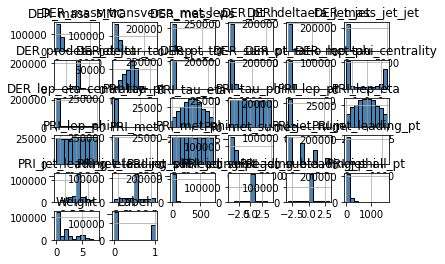

In [ ]:
plt.figure(figsize=[32,32])
dataset.hist(color='steelblue', edgecolor='black')

# plt.tight_layout(rect=(0, 0, 1.2, 1.2))

**Density Plots**

Density plots are another way of getting a quick idea of the distribution of each attribute. The
plots look like an abstracted histogram with a smooth curve drawn through the top of each bin,
much like your eye tried to do with the histograms.


In [ ]:
# dataset.plot(kind='density', subplots=True, layout=(33,33), sharex=False)


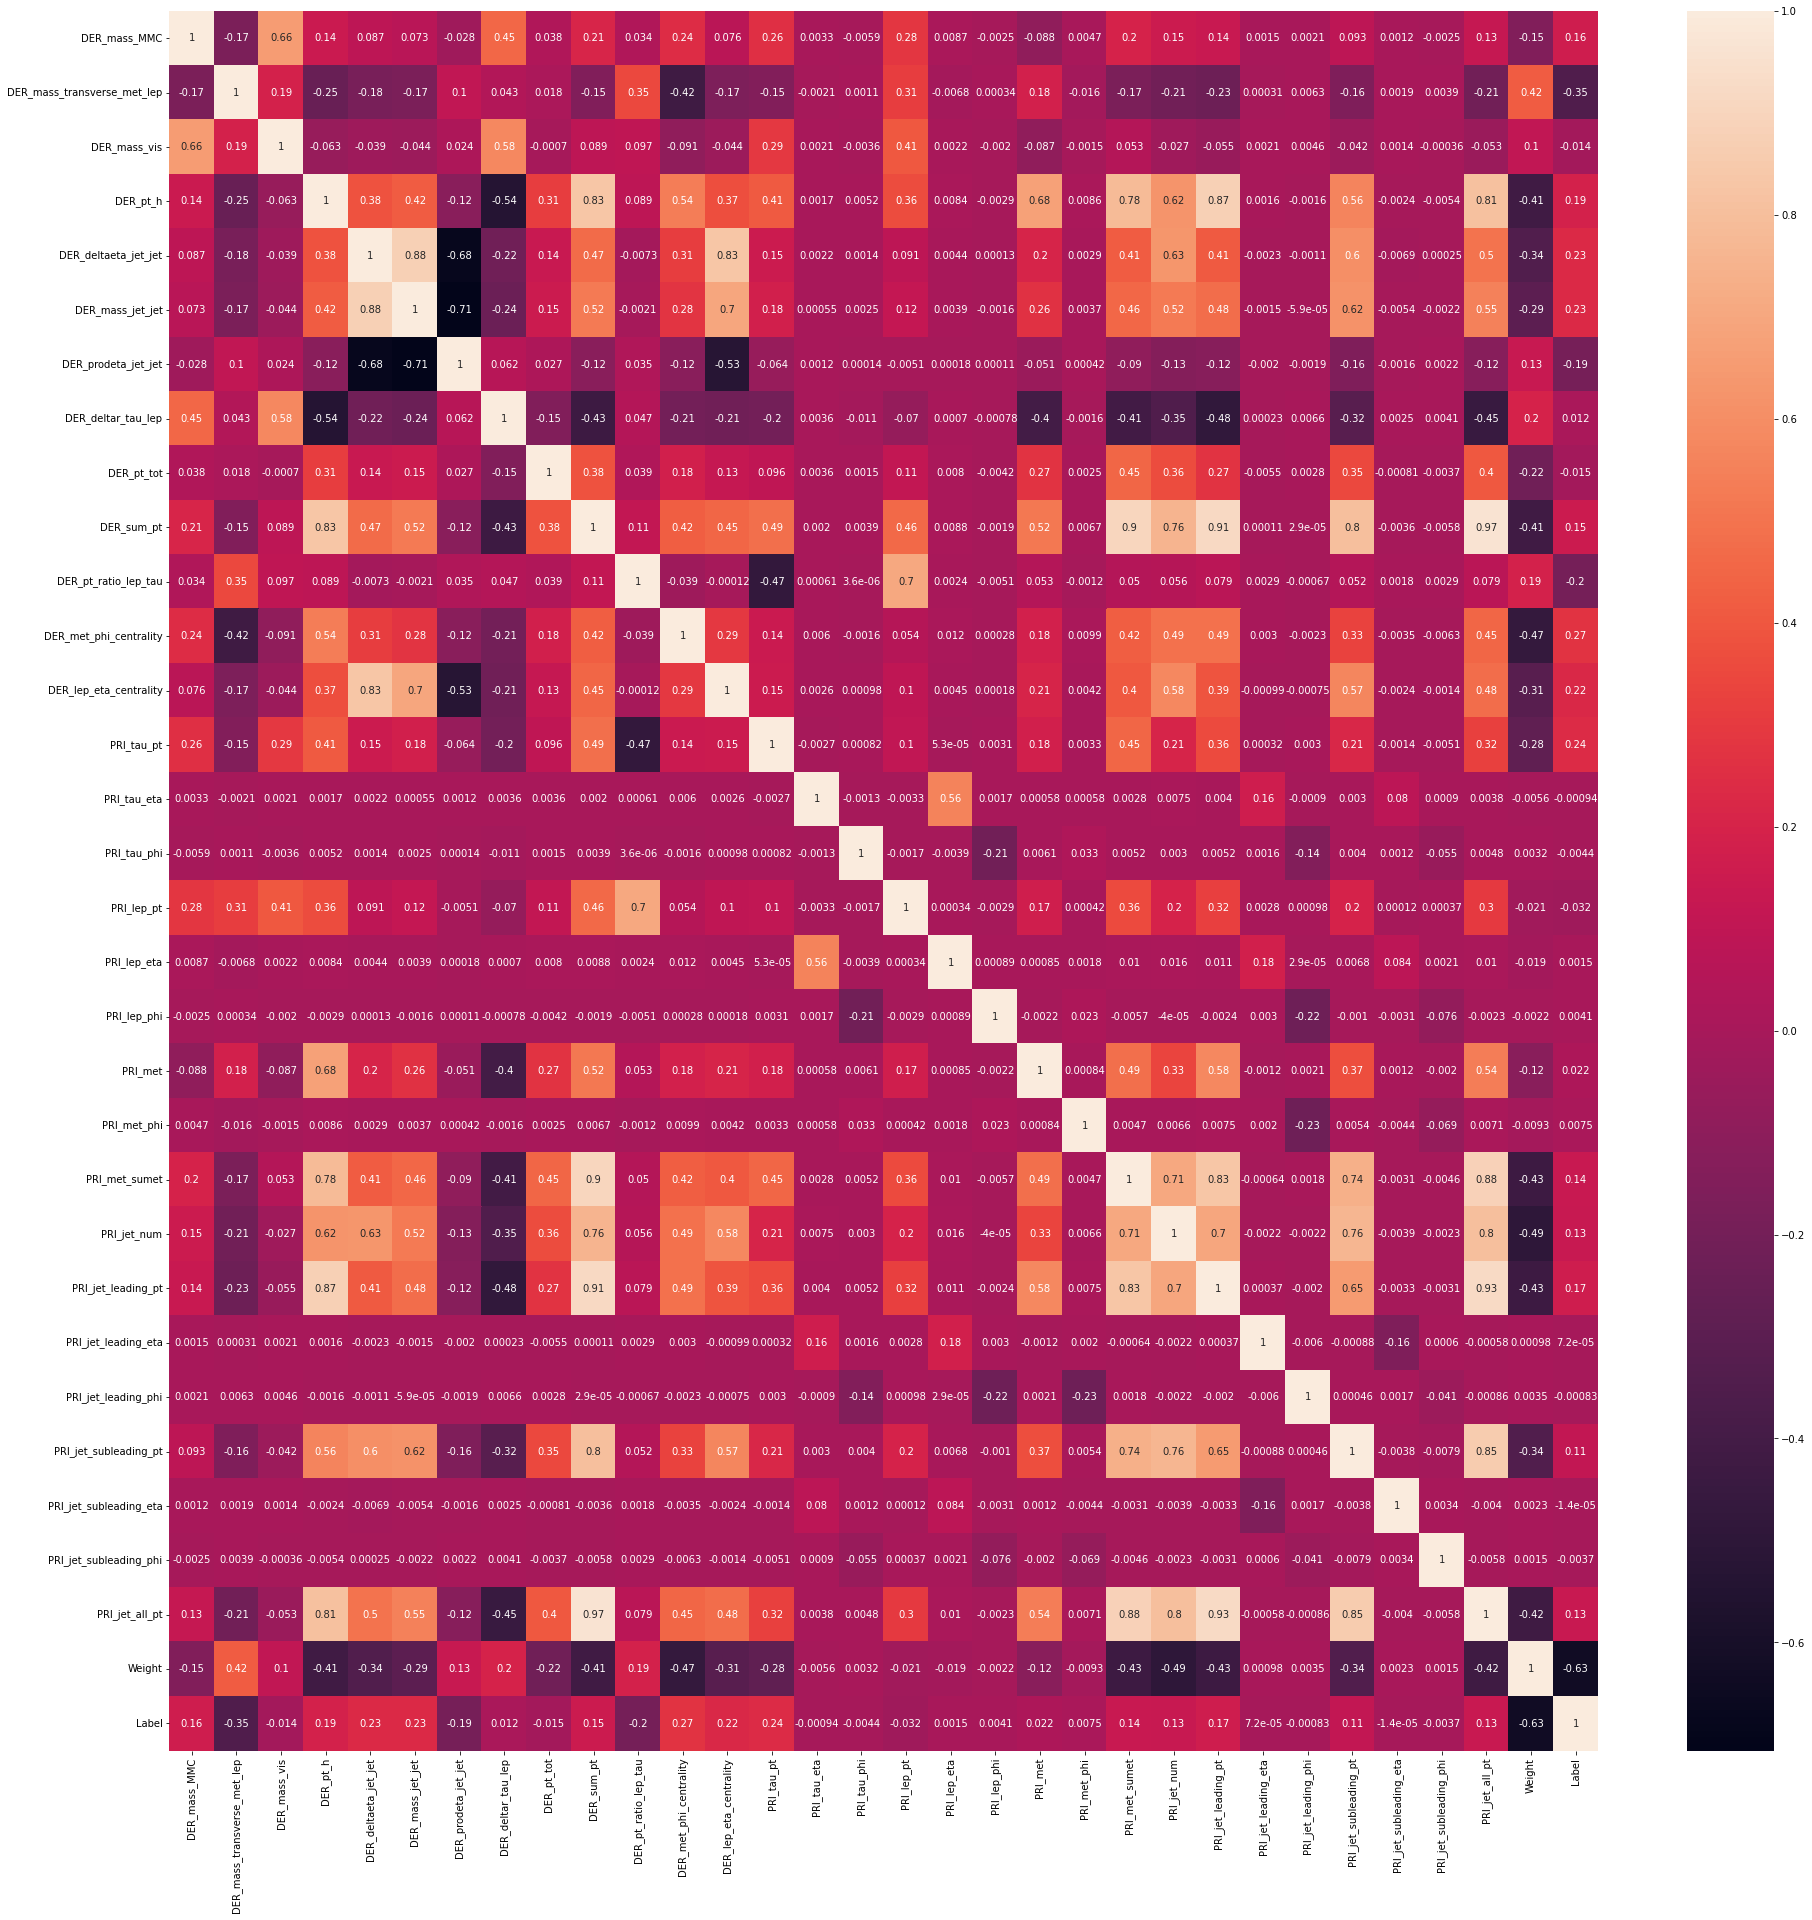

In [ ]:
plt.figure(figsize=(32,32))
sns.heatmap(dataset.corr(), annot=True )

In [ ]:
y = dataset['Label']
x = dataset
x.drop(columns='Label', inplace=True)



In [ ]:
# Dropping this cos in kaggle it is not present in testing setW
x.drop(columns='Weight', inplace=True)

In [ ]:
y.head()

0    1
1    0
2    0
3    0
4    0
Name: Label, dtype: int64

In [ ]:

x.head()

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,DER_lep_eta_centrality,PRI_tau_pt,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
0,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,197.760,1.582,1.396,0.2,32.638,1.017,0.381,51.626,2.273,-2.414,16.824,-0.277,258.733,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497
1,160.937,68.768,103.235,48.146,0.00,0.000,0.000,3.473,2.078,125.157,0.879,1.414,0.0,42.014,2.039,-3.011,36.918,0.501,0.103,44.704,-1.916,164.546,1,46.226,0.725,1.158,0.000,0.00,0.000,46.226
2,0.000,162.172,125.953,35.635,0.00,0.000,0.000,3.148,9.336,197.814,3.776,1.414,0.0,32.154,-0.705,-2.093,121.409,-0.953,1.052,54.283,-2.186,260.414,1,44.251,2.053,-2.028,0.000,0.00,0.000,44.251
3,143.905,81.417,80.943,0.414,0.00,0.000,0.000,3.310,0.414,75.968,2.354,-1.285,0.0,22.647,-1.655,0.010,53.321,-0.522,-3.100,31.082,0.060,86.062,0,0.000,0.000,0.000,0.000,0.00,0.000,-0.000
4,175.864,16.915,134.805,16.405,0.00,0.000,0.000,3.891,16.405,57.983,1.056,-1.385,0.0,28.209,-2.197,-2.231,29.774,0.798,1.569,2.723,-0.871,53.131,0,0.000,0.000,0.000,0.000,0.00,0.000,0.000


**Univariate Selection**

Statistical tests can be used to select those features that have the strongest relationship with
the output variable. The scikit-learn library provides the **SelectKBest** class2
that can be used
with a suite of different statistical tests to select a specific number of features. The example
below uses the **chi-squared (chi2)** statistical test for non-negative features to select 4 of the best
features from the Pima Indians onset of diabetes dataset.

In [ ]:
# feature extraction
# test = SelectKBest(score_func=chi2, k=4)
# fit = test.fit(x, y)
# # summarize scores
# #set_printoptions(precision=3)
# print(fit.scores_)

ValueError: ignored

In [ ]:
# print(len(fit.scores_))
# print(len(dataset.columns))

31
31


In [ ]:
# min(fit.scores_)

1.649316696626284

In [ ]:
# for index,score in enumerate(fit.scores_):
#   if score > 1000:
#     print(dataset.columns[index])

DER_mass_MMC
DER_mass_transverse_met_lep
DER_mass_vis
DER_pt_h
DER_deltaeta_jet_jet
DER_mass_jet_jet
DER_pt_tot
DER_sum_pt
DER_pt_ratio_lep_tau
DER_met_phi_centrality
DER_lep_eta_centrality
PRI_tau_pt
PRI_lep_pt
PRI_lep_eta
PRI_met
PRI_met_sumet
PRI_jet_num
PRI_jet_leading_pt
PRI_jet_leading_eta
PRI_jet_leading_phi
PRI_jet_subleading_pt
PRI_jet_subleading_eta
PRI_jet_subleading_phi
PRI_jet_all_pt
Weight


In [ ]:
train_x,test_x,train_y,test_y=train_test_split(x,y, random_state=355 , stratify=y, test_size = 0.25)

In [ ]:
train_x.shape

(187500, 30)

In [ ]:
# Scaling the numeric values in the dataset

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [ ]:
scaled_data = scaler.fit_transform(train_x)

In [ ]:
scaled_data_df = pd.DataFrame(data=scaled_data, columns=train_x.columns,index=train_x.index)

In [ ]:
scaled_data_df.head()

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,DER_lep_eta_centrality,PRI_tau_pt,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
59119,0.216608,-0.793389,0.171789,-0.859009,-0.484432,-0.395099,0.122234,0.896890,-0.701715,-0.674185,-0.708709,-1.075943,-0.444211,0.222640,-1.395860,-0.997658,-0.450708,-0.613312,0.814137,-0.985938,0.160101,-0.850355,-1.002182,-0.811952,0.002686,0.005031,-0.533014,0.001149,-0.001544,-0.745026
101568,0.789500,0.040737,1.013328,-0.427431,-0.484432,-0.395099,0.122234,0.774151,-0.738456,-0.152936,0.260394,-1.075106,-0.444211,0.085140,0.582254,-0.427090,0.934422,-0.398162,1.504209,-0.673560,0.677184,-0.041016,0.021818,-0.287845,0.790129,-0.331092,-0.533014,0.001149,-0.001544,-0.409920
130365,-0.306043,-0.550007,-0.447985,1.631149,-0.357952,0.172238,0.556280,-1.634588,0.275710,2.180558,1.615948,0.110703,-0.444211,-0.268570,-1.315121,-0.167691,2.031704,-0.390252,-0.199511,-0.008211,-0.442518,2.378007,2.069818,1.340065,-0.601429,1.515447,2.780654,-0.930515,-2.869479,2.177509
79655,0.435530,1.224631,-0.217638,-0.884292,-0.484432,-0.395099,0.122234,0.675705,-0.773114,-0.699958,1.645675,-0.942791,-0.444211,-0.823303,1.110356,1.025766,0.477664,1.682943,-0.545098,-0.121979,1.296911,-1.356410,-1.002182,-0.811952,0.002686,0.005031,-0.533014,0.001149,-0.001544,-0.745026
5084,0.325625,-1.273307,-0.071943,0.393132,2.016682,1.359576,-1.515627,-0.587477,-0.368432,0.972132,-0.960794,0.846809,0.238533,0.946991,1.528058,-0.601124,-0.406913,1.691644,-1.673207,0.130402,-1.706805,0.619030,1.045818,1.194838,-1.405473,0.838929,0.977592,1.509385,-1.611308,1.021981


In [ ]:
scaled_data_df.shape

(187500, 30)

In [ ]:
svm_classifier = SVC()

In [ ]:
svm_classifier.fit(scaled_data_df, train_y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
pred_y = svm_classifier.predict(test_x)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
sc=accuracy_score(test_y,pred_y)
sc

0.657328

In [ ]:
!pip install xgboost

In [ ]:
xgb=XGBClassifier()
pred_y_xgb = xgb.fit(train_x, train_y).predict(test_x)
sc_xgb=accuracy_score(test_y,pred_y_xgb)
sc_xgb

0.82776

In [ ]:
logistic_regression= LogisticRegression()
logistic_regression.fit(train_x, train_y)
y_pred=logistic_regression.predict(test_x)
sc_log_reg=accuracy_score(test_y,y_pred)
sc_log_reg

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.736112

In [ ]:
# fit the model on the whole dataset
random_forest = RandomForestClassifier()

random_forest.fit(train_x, train_y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
decisionTreeModel = DecisionTreeClassifier(criterion= 'entropy',
                                           max_depth = None, 
                                           splitter='best', 
                                           random_state=10)

decisionTreeModel.fit(train_x, train_y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=10, splitter='best')

In [ ]:
KNeighborsModel = KNeighborsClassifier(n_neighbors = 7,
                                       weights = 'distance',
                                      algorithm = 'brute')

KNeighborsModel.fit(train_x, train_y)

KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='distance')

In [ ]:
#evaluation Details
models = [logistic_regression, random_forest, decisionTreeModel, KNeighborsModel, xgb, svm_classifier ]

for model in models:
    print(type(model).__name__,' Train Score is   : ' ,model.score(train_x, train_y))
    print(type(model).__name__,' Test Score is    : ' ,model.score(test_x, test_y))
    
    y_pred = model.predict(test_x)
    print(type(model).__name__,' F1 Score is      : ' ,f1_score(test_y,y_pred))
    print('--------------------------------------------------------------------------')

LogisticRegression  Train Score is   :  0.7379946666666667
LogisticRegression  Test Score is    :  0.736112
LogisticRegression  F1 Score is      :  0.57464861379755
--------------------------------------------------------------------------
RandomForestClassifier  Train Score is   :  0.9999893333333333
RandomForestClassifier  Test Score is    :  0.836752
RandomForestClassifier  F1 Score is      :  0.7476066790352504
--------------------------------------------------------------------------
DecisionTreeClassifier  Train Score is   :  1.0
DecisionTreeClassifier  Test Score is    :  0.764752
DecisionTreeClassifier  F1 Score is      :  0.6581572155960104
--------------------------------------------------------------------------
KNeighborsClassifier  Train Score is   :  1.0
KNeighborsClassifier  Test Score is    :  0.798896
KNeighborsClassifier  F1 Score is      :  0.7004313940462855
--------------------------------------------------------------------------
XGBClassifier  Train Score is   : 

In [ ]:
import pickle
filename = 'higgs_boson_finalized_model.sav'
pickle.dump(xgb, open(filename, 'wb'))

In [ ]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))

In [ ]:
result = loaded_model.score(test_x, test_y)
print(result)

0.82776
